In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")
pd.set_option('display.width', 1000)
print(data.head())

   id uname  year     month  fan  tubelight  television  refrigerator  washing_machine  microwave_ovan  water_purifier   ac  water_heater  motor_pump  air_cooler  computer  electric_stove
0   1    C1  2019   January   20         25          40            50               50              45              30  140            40          51          80        70              65
1   2    C1  2019  February   23         21          22            34               78              45              55  167           102          54          67        70              40
2   4    C1  2019     March   28         17          24            25               37              33              10  126            15          45          55        60              30
3   5    C1  2019     April   32         16          28            25               37              33              10  137            23          45          55        60              21
4   6    C1  2019       May   38         15          47     

In [ ]:
# DATA MANUPULATION AND DATA VIRTUALIZATION

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                 0
uname              0
year               0
month              0
fan                0
tubelight          0
television         0
refrigerator       0
washing_machine    0
microwave_ovan     0
water_purifier     0
ac                 0
water_heater       0
motor_pump         0
air_cooler         0
computer           0
electric_stove     0
dtype: int64


In [ ]:
# year wise
# Assuming 'data' is your DataFrame containing the dataset
# Group the data by year and month
grouped_data = data.groupby(['year', 'month']).sum()

# List of appliances
appliances = ['fan', 'tubelight', 'television', 'refrigerator', 'washing_machine',
              'microwave_ovan', 'water_purifier', 'ac', 'water_heater',
              'motor_pump', 'air_cooler', 'computer', 'electric_stove']

# Plot each appliance's consumption for each year in a month-wise manner
for appliance in appliances:
    plt.figure(figsize=(10, 6))
    for year in grouped_data.index.get_level_values('year').unique():
        data_year = grouped_data.loc[year]
        plt.plot(data_year.index.get_level_values('month'), data_year[appliance], label=year)
    plt.title(f'Electricity Consumption of {appliance.capitalize()} by Year (Month-wise)')
    plt.xlabel('Month')
    plt.ylabel('Electricity Consumption')
    plt.legend(title='Year', loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-115-d7c5ecda3acb>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


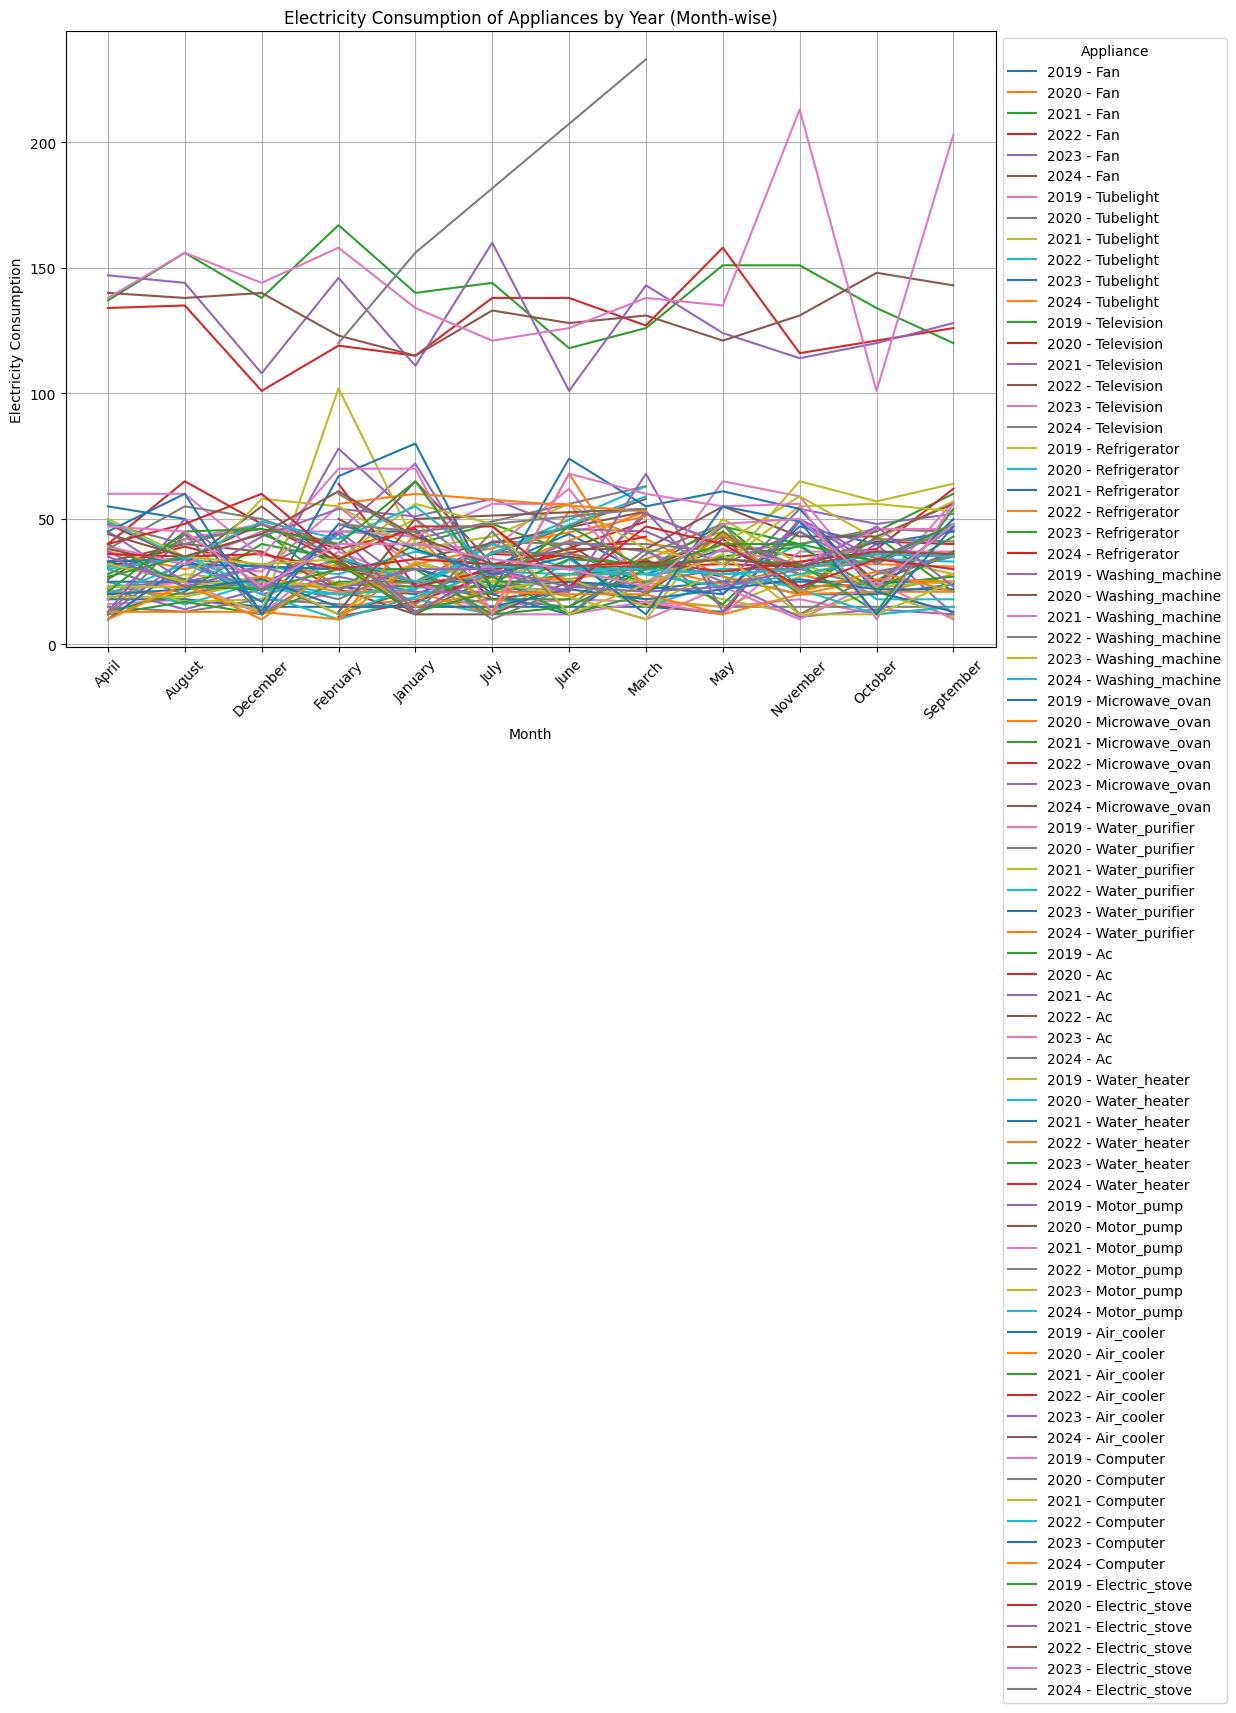

In [ ]:
# year all combines
# Assuming 'data' is your DataFrame containing the dataset

# Group the data by year and month
grouped_data = data.groupby(['year', 'month']).sum()

# List of appliances
appliances = ['fan', 'tubelight', 'television', 'refrigerator', 'washing_machine',
              'microwave_ovan', 'water_purifier', 'ac', 'water_heater',
              'motor_pump', 'air_cooler', 'computer', 'electric_stove']

# Plot combined electricity consumption of all appliances for each year in a month-wise manner
plt.figure(figsize=(12, 8))
for appliance in appliances:
    for year in grouped_data.index.get_level_values('year').unique():
        data_year = grouped_data.loc[year]
        plt.plot(data_year.index.get_level_values('month'), data_year[appliance], label=f"{year} - {appliance.capitalize()}")

plt.title('Electricity Consumption of Appliances by Year (Month-wise)')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption')
plt.legend(title='Appliance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

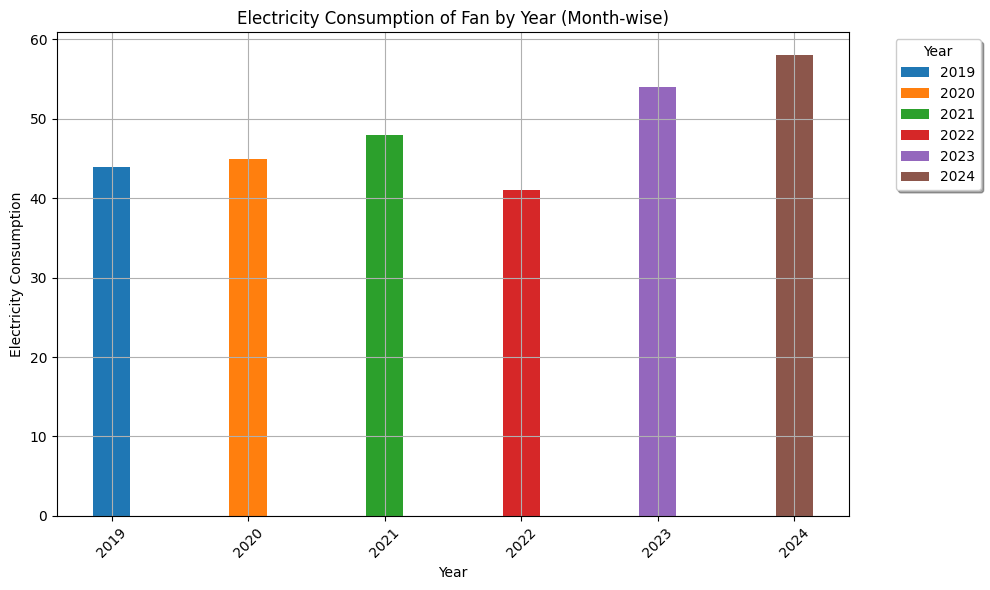

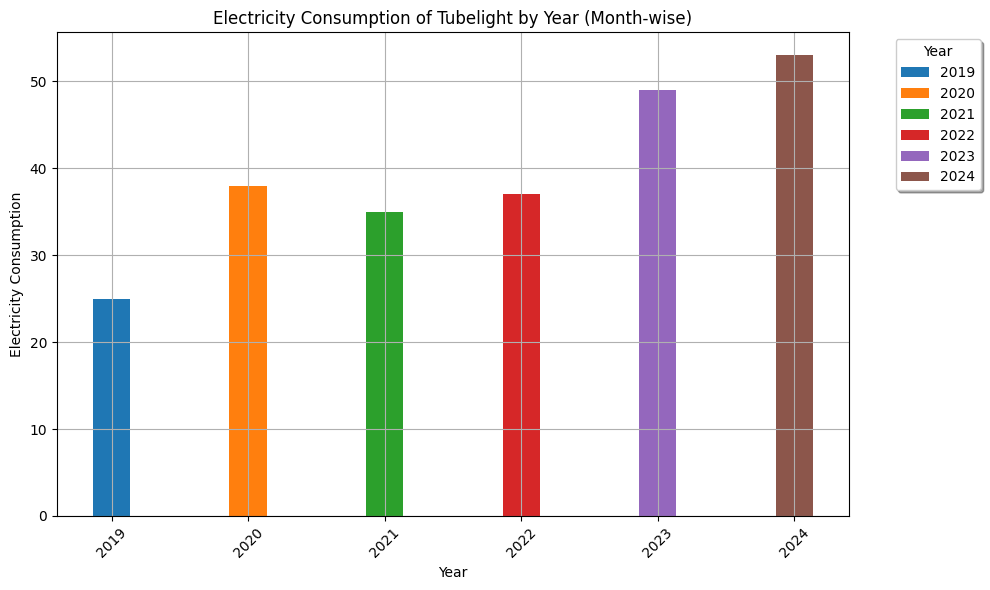

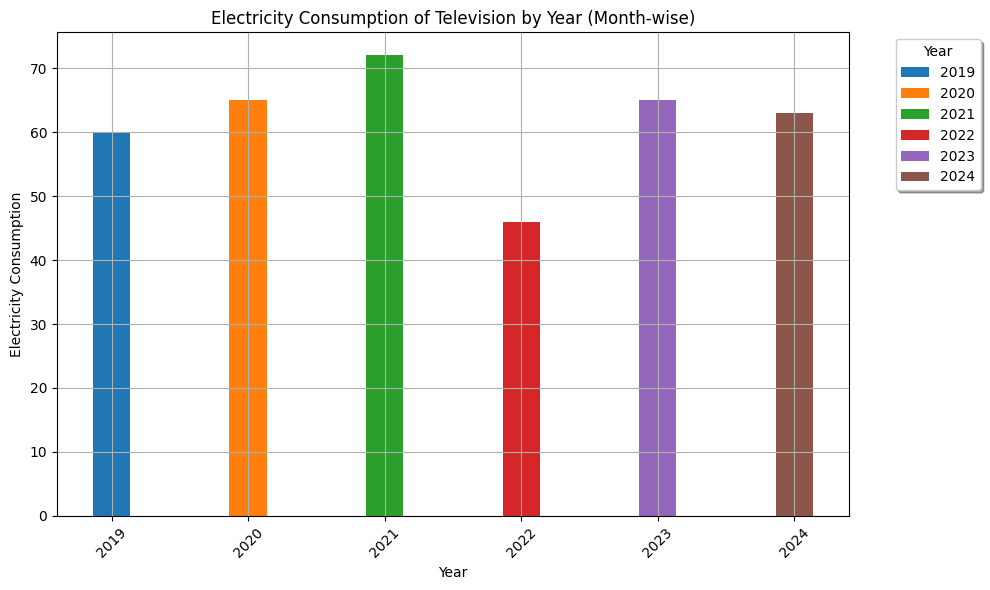

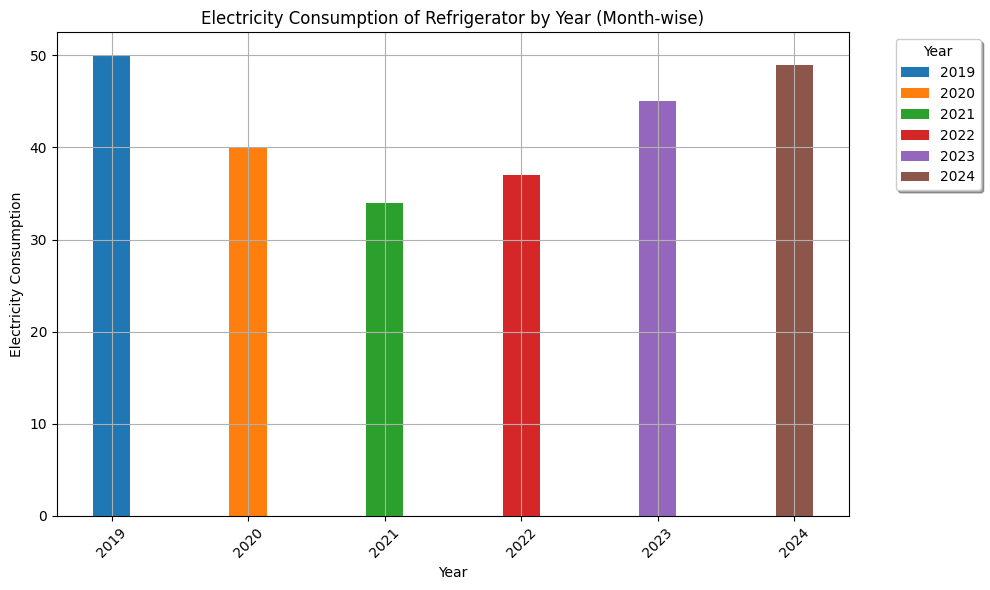

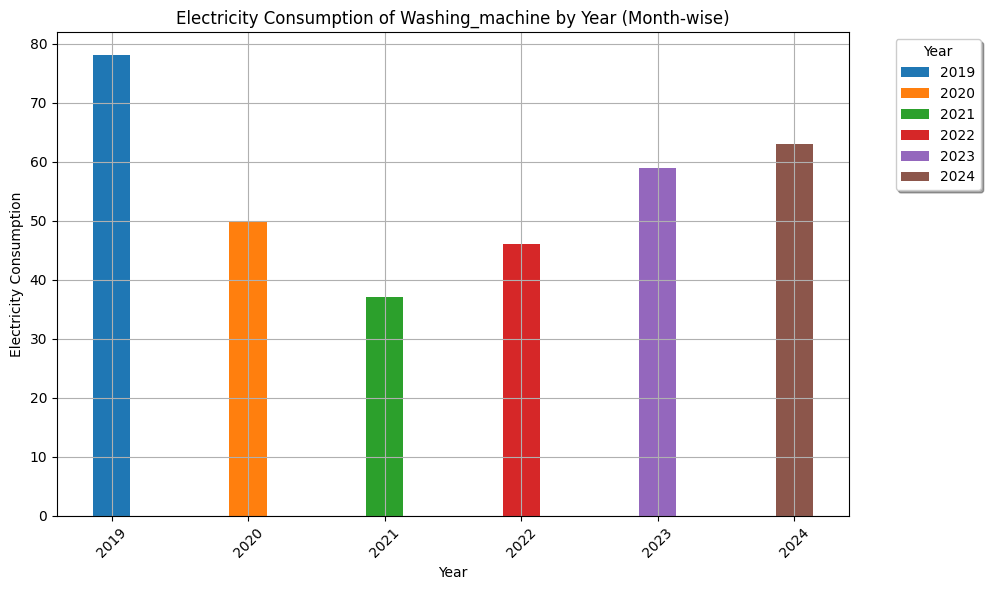

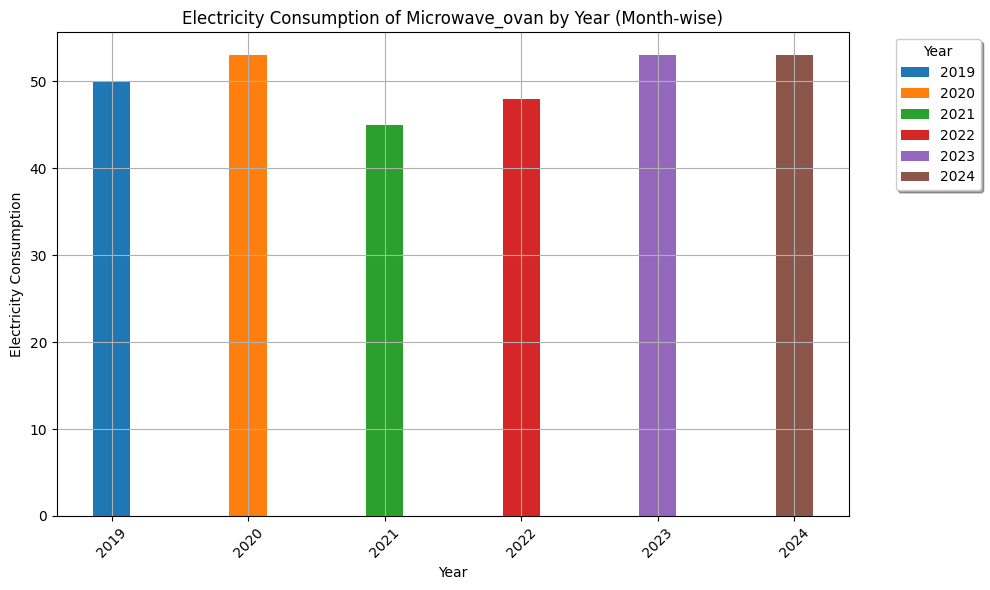

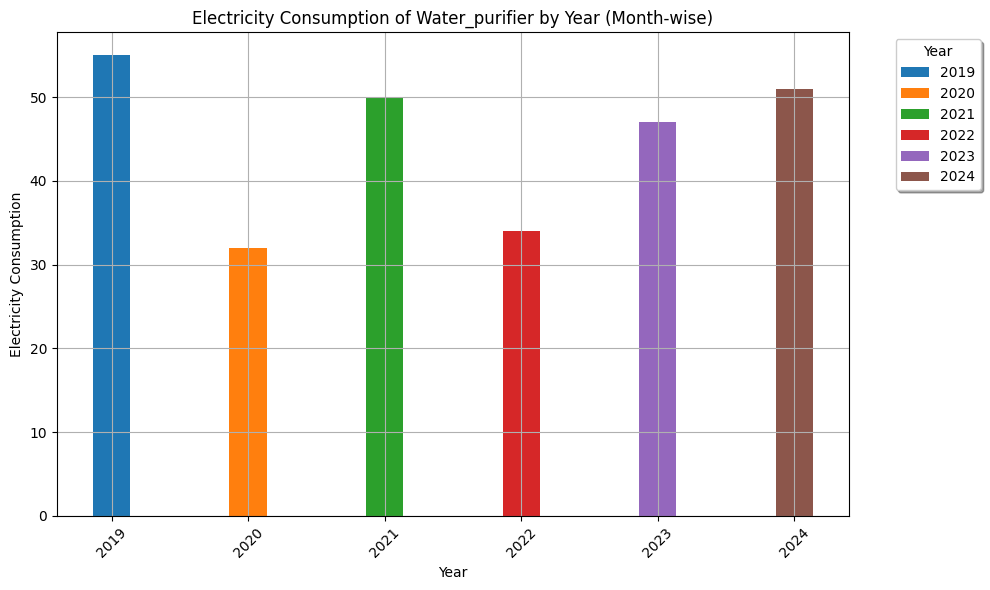

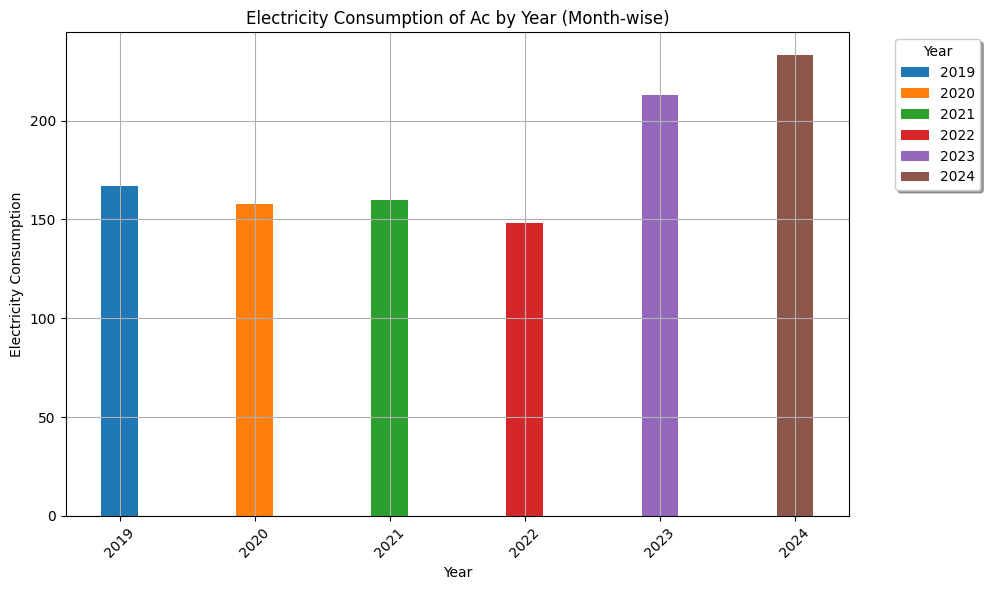

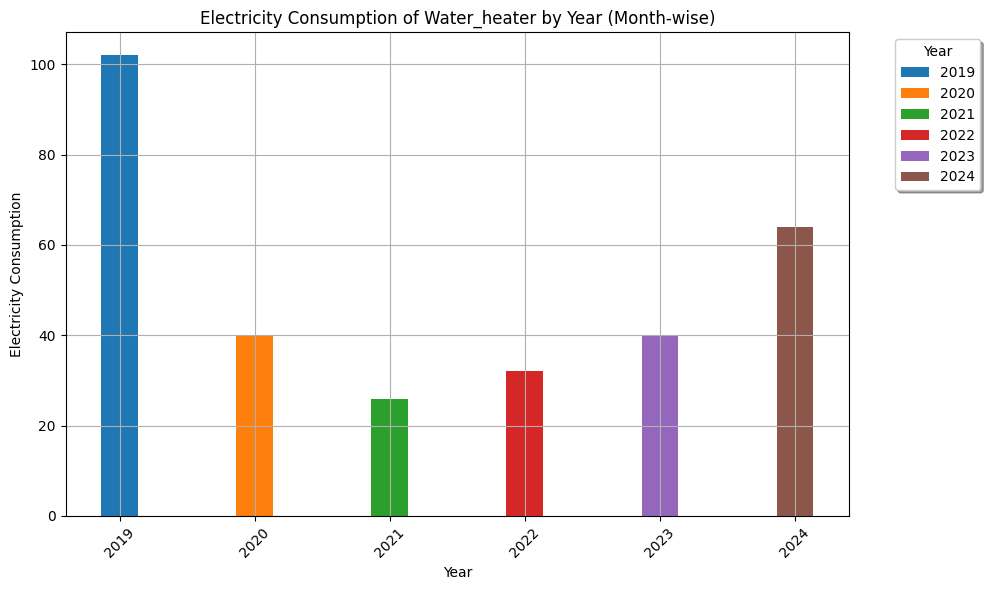

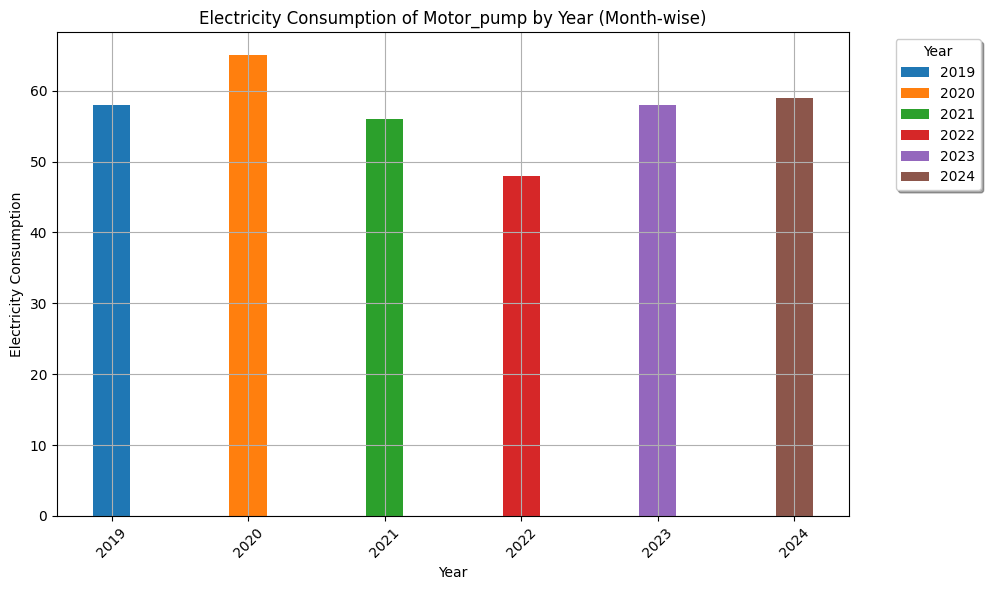

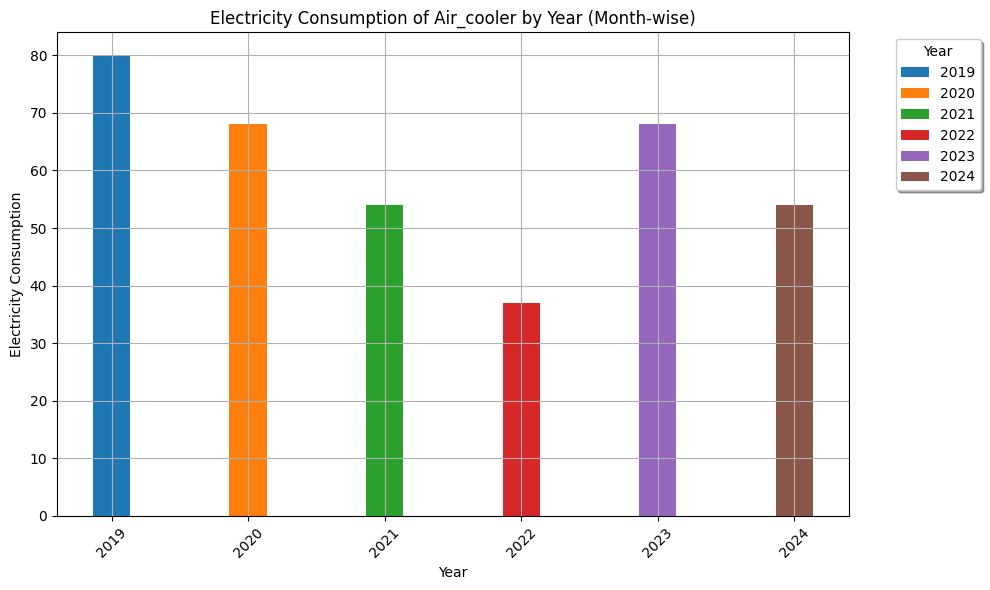

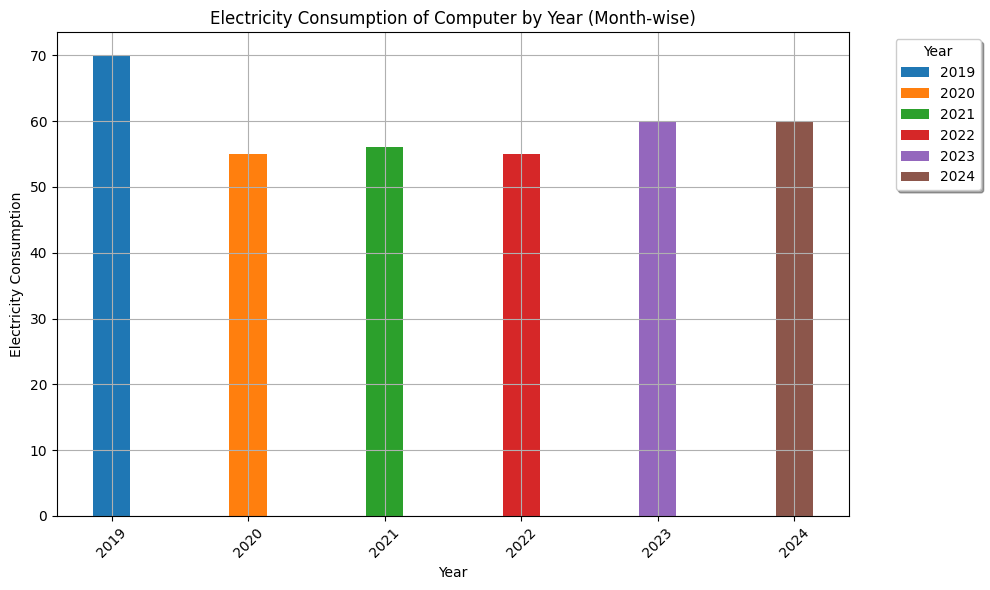

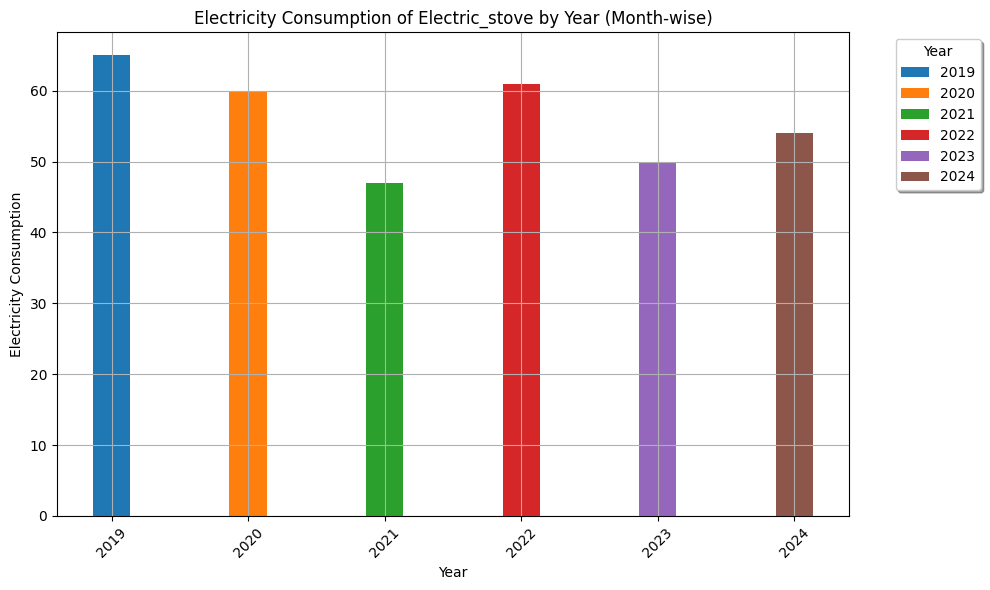

In [ ]:
# Plot each appliance's consumption for each year in a month-wise manner
for appliance in appliances:
    plt.figure(figsize=(10, 6))
    # Count the total number of years

    # Set the width of each bar
    bar_width = 3.0

    total_years = len(grouped_data.index.get_level_values('year').unique())
    # Calculate the total number of bars (months) per year
    total_bars_per_year = len(grouped_data) // total_years
    # Calculate the x-axis positions for each year's bars
    x_positions = np.arange(total_years) * (total_bars_per_year + 1) + 1

    for i, year in enumerate(grouped_data.index.get_level_values('year').unique()):
        data_year = grouped_data.loc[year]
        # Plot the bar for the current year
        plt.bar(x_positions[i], data_year[appliance], width=bar_width, label=year)




    plt.title(f'Electricity Consumption of {appliance.capitalize()} by Year (Month-wise)')
    plt.xlabel('Year')
    plt.ylabel('Electricity Consumption')
    plt.xticks(x_positions, grouped_data.index.get_level_values('year').unique(), rotation=45)
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.05, 1), fancybox=True, shadow=True)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset


# Split the data into features (X) and target variable (y)
X = data.drop(columns=['id', 'uname', 'year', 'month'])  # Assuming these columns are not features
y = data['electric_stove']  # Assuming 'electric_stove' is the target variable

# Split the data into training, testing, and validation sets
# First, split the data into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the temporary set into testing and validation sets (50% testing, 50% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (44, 13) (44,)
Testing set shape: (9, 13) (9,)
Validation set shape: (10, 13) (10,)


In [ ]:
# LR

In [ ]:
# Performance analysis for training data:
# Mean Squared Error (MSE): 20.7686
# Mean Absolute Error (MAE): 3.6101
# Root Mean Squared Error (RMSE): 4.5573
# R^2 Score: 0.7330

# Performance analysis for testing data:
# Mean Squared Error (MSE): 103.2494
# Mean Absolute Error (MAE): 8.5578
# Root Mean Squared Error (RMSE): 10.1612
# R^2 Score: -0.2232

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables) and the target variable (dependent variable)
X = data.drop(['id', 'uname', 'year', 'month', 'fan'], axis=1)  # Features
y = data['fan']  # Target variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Performance analysis for training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Performance analysis for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Performance analysis for training data:")
print("Mean Squared Error (MSE): {:.4f}".format(mse_train))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_train))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse_train))
print("R^2 Score: {:.4f}".format(r2_train))
print()
print("Performance analysis for testing data:")
print("Mean Squared Error (MSE): {:.4f}".format(mse_test))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_test))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse_test))
print("R^2 Score: {:.4f}".format(r2_test))

Performance analysis for training data:
Mean Squared Error (MSE): 20.7686
Mean Absolute Error (MAE): 3.6101
Root Mean Squared Error (RMSE): 4.5573
R^2 Score: 0.7330

Performance analysis for testing data:
Mean Squared Error (MSE): 103.2494
Mean Absolute Error (MAE): 8.5578
Root Mean Squared Error (RMSE): 10.1612
R^2 Score: -0.2232


In [ ]:
# ARIMA

In [ ]:
# Overall Performance Analysis for Training Data:
# Mean Squared Error (MSE): 221.0509
# Mean Absolute Error (MAE): 9.5059
# Root Mean Squared Error (RMSE): 13.9725
# Mean R^2 Score: -0.3263

# Overall Performance Analysis for Testing Data:
# Mean Squared Error (MSE): 324.2096
# Mean Absolute Error (MAE): 13.6796
# Root Mean Squared Error (RMSE): 16.5935
# Mean R^2 Score: -0.3415

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore", message="No frequency information was provided*")
# Filter out specific warnings
warnings.filterwarnings("ignore", message="No frequency information was provided*")
warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed*")



# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables)
X = data.drop(['id', 'uname', 'year', 'month'], axis=1)

# List of appliances (excluding electric_stove)
appliances = X.columns.tolist()
# appliances.remove('electric_stove')

# Initialize dictionaries to store model results
mse_results_train = {}
mae_results_train = {}
rmse_results_train = {}
r2_results_train = {}

mse_results_test = {}
mae_results_test = {}
rmse_results_test = {}
r2_results_test = {}

# Iterate over each appliance
for appliance in appliances:
    # Set the target variable for the current appliance
    y = X[appliance]

    # Drop any NaN values in the time series data
    y = y.dropna()

    if len(y) < 2:
        print(f"Not enough data for appliance {appliance}.")
        continue

    # Split the dataset into training and testing sets (70% training, 30% testing)
    train_size = int(len(y) * 0.7)
    train, test = y[0:train_size], y[train_size:]

    # Fit ARIMA model
    model = ARIMA(train, order=(12,1,0))  # p=5, d=1, q=0
    model_fit = model.fit()

    # Make predictions for both training and testing data
    predictions_train = model_fit.predict(start=train.index[0], end=train.index[-1])
    predictions_test = model_fit.forecast(steps=len(test))

    # Performance analysis for training data
    mse_train = mean_squared_error(train, predictions_train)
    mae_train = mean_absolute_error(train, predictions_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(train, predictions_train)

    # Performance analysis for testing data
    mse_test = mean_squared_error(test, predictions_test)
    mae_test = mean_absolute_error(test, predictions_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(test, predictions_test)

    # Store results in dictionaries
    mse_results_train[appliance] = mse_train
    mae_results_train[appliance] = mae_train
    rmse_results_train[appliance] = rmse_train
    r2_results_train[appliance] = r2_train

    mse_results_test[appliance] = mse_test
    mae_results_test[appliance] = mae_test
    rmse_results_test[appliance] = rmse_test
    r2_results_test[appliance] = r2_test

# Overall performance analysis for training data
overall_mse_train = np.mean(list(mse_results_train.values()))
overall_mae_train = np.mean(list(mae_results_train.values()))
overall_rmse_train = np.mean(list(rmse_results_train.values()))
overall_r2_train = np.mean(list(r2_results_train.values()))

# Overall performance analysis for testing data
overall_mse_test = np.mean(list(mse_results_test.values()))
overall_mae_test = np.mean(list(mae_results_test.values()))
overall_rmse_test = np.mean(list(rmse_results_test.values()))
overall_r2_test = np.mean(list(r2_results_test.values()))


# Print overall performance analysis with four decimal points
print("Overall Performance Analysis for Training Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_mse_train))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_mae_train))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_rmse_train))
print("Mean R^2 Score: {:.4f}".format(overall_r2_train))

print("\nOverall Performance Analysis for Testing Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_mse_test))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_mae_test))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_rmse_test))
print("Mean R^2 Score: {:.4f}".format(overall_r2_test))


Overall Performance Analysis for Training Data:
Mean Squared Error (MSE): 221.0509
Mean Absolute Error (MAE): 9.5059
Root Mean Squared Error (RMSE): 13.9725
Mean R^2 Score: -0.3263

Overall Performance Analysis for Testing Data:
Mean Squared Error (MSE): 324.2096
Mean Absolute Error (MAE): 13.6796
Root Mean Squared Error (RMSE): 16.5935
Mean R^2 Score: -0.3415


In [ ]:
# GBM -  traditional method

In [ ]:
# Overall Performance Analysis for Training Data:
# Mean Squared Error (MSE): 0.0000
# Mean Absolute Error (MAE): 0.0006
# Root Mean Squared Error (RMSE): 0.0008
# Mean R^2 Score: 1.0000

# Overall Performance Analysis for Testing Data:
# Mean Squared Error (MSE): 4.0032
# Mean Absolute Error (MAE): 0.7680
# Root Mean Squared Error (RMSE): 1.7313
# Mean R^2 Score: 0.9752

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables)
X = data.drop(['id', 'uname', 'year', 'month'], axis=1)

# List of appliances (excluding electric_stove)
appliances = X.columns.tolist()
# appliances.remove('electric_stove')

# Initialize dictionaries to store model results
train_mse_results = {}
train_mae_results = {}
train_rmse_results = {}
train_r2_results = {}

test_mse_results = {}
test_mae_results = {}
test_rmse_results = {}
test_r2_results = {}

# Iterate over each appliance
for appliance in appliances:
    # Set the target variable for the current appliance
    y = X[appliance]

    # Split the dataset into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Performance analysis for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store results for training data in dictionaries
    train_mse_results[appliance] = train_mse
    train_mae_results[appliance] = train_mae
    train_rmse_results[appliance] = train_rmse
    train_r2_results[appliance] = train_r2

    # Make predictions on testing data
    y_test_pred = model.predict(X_test)

    # Performance analysis for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results for testing data in dictionaries
    test_mse_results[appliance] = test_mse
    test_mae_results[appliance] = test_mae
    test_rmse_results[appliance] = test_rmse
    test_r2_results[appliance] = test_r2

# Overall performance analysis for training data
overall_train_mse = np.mean(list(train_mse_results.values()))
overall_train_mae = np.mean(list(train_mae_results.values()))
overall_train_rmse = np.mean(list(train_rmse_results.values()))
overall_train_r2 = np.mean(list(train_r2_results.values()))

# Overall performance analysis for testing data
overall_test_mse = np.mean(list(test_mse_results.values()))
overall_test_mae = np.mean(list(test_mae_results.values()))
overall_test_rmse = np.mean(list(test_rmse_results.values()))
overall_test_r2 = np.mean(list(test_r2_results.values()))

# Print overall performance analysis with four decimal points
print("Overall Performance Analysis for Training Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_train_mse))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_train_mae))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_train_rmse))
print("Mean R^2 Score: {:.4f}".format(overall_train_r2))

print("\nOverall Performance Analysis for Testing Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_test_mse))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_test_mae))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_test_rmse))
print("Mean R^2 Score: {:.4f}".format(overall_test_r2))


Overall Performance Analysis for Training Data:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0006
Root Mean Squared Error (RMSE): 0.0008
Mean R^2 Score: 1.0000

Overall Performance Analysis for Testing Data:
Mean Squared Error (MSE): 4.0032
Mean Absolute Error (MAE): 0.7680
Root Mean Squared Error (RMSE): 1.7313
Mean R^2 Score: 0.9752


In [ ]:
# GBM AND LR

In [ ]:
# Overall Performance Analysis for Combined Model:
# Training Data
# MSE: 0.0000
# MAE: 0.0003
# RMSE: 0.0004
# R^2: 1.0000

# Testing Data
# MSE: 1.0008
# MAE: 0.3840
# RMSE: 0.8657
# R^2: 0.9938

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables)
X = data.drop(['id', 'uname', 'year', 'month'], axis=1)

# List of appliances (including electric_stove)
appliances = X.columns.tolist()

combined_train_mse_results = []
combined_train_mae_results = []
combined_train_rmse_results = []
combined_train_r2_results = []
combined_test_mse_results = []
combined_test_mae_results = []
combined_test_rmse_results = []
combined_test_r2_results = []

# Iterate over each appliance
for appliance in appliances:
    # Set the target variable for the current appliance
    y = X[appliance]

    # Split the dataset into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Train the Gradient Boosting model
    gbm_model = GradientBoostingRegressor(random_state=42)
    gbm_model.fit(X_train, y_train)

    # Make predictions with both models on training data
    lr_train_pred = lr_model.predict(X_train)
    gbm_train_pred = gbm_model.predict(X_train)

    # Make predictions with both models on testing data
    lr_test_pred = lr_model.predict(X_test)
    gbm_test_pred = gbm_model.predict(X_test)

    # Combine predictions by averaging
    combined_train_pred = (lr_train_pred + gbm_train_pred) / 2
    combined_test_pred = (lr_test_pred + gbm_test_pred) / 2

    # Performance analysis for combined model on training data
    combined_train_mse = mean_squared_error(y_train, combined_train_pred)
    combined_train_mae = mean_absolute_error(y_train, combined_train_pred)
    combined_train_rmse = np.sqrt(combined_train_mse)
    combined_train_r2 = r2_score(y_train, combined_train_pred)

    # Performance analysis for combined model on testing data
    combined_test_mse = mean_squared_error(y_test, combined_test_pred)
    combined_test_mae = mean_absolute_error(y_test, combined_test_pred)
    combined_test_rmse = np.sqrt(combined_test_mse)
    combined_test_r2 = r2_score(y_test, combined_test_pred)


    combined_train_mse_results.append(combined_train_mse)
    combined_train_mae_results.append(combined_train_mae)
    combined_train_rmse_results.append(combined_train_rmse)
    combined_train_r2_results.append(combined_train_r2)
    combined_test_mse_results.append(combined_test_mse)
    combined_test_mae_results.append(combined_test_mae)
    combined_test_rmse_results.append(combined_test_rmse)
    combined_test_r2_results.append(combined_test_r2)

# Overall performance analysis for combined model
overall_combined_train_mse = np.mean(combined_train_mse_results)
overall_combined_train_mae = np.mean(combined_train_mae_results)
overall_combined_train_rmse = np.mean(combined_train_rmse_results)
overall_combined_train_r2 = np.mean(combined_train_r2_results)

overall_combined_test_mse = np.mean(combined_test_mse_results)
overall_combined_test_mae = np.mean(combined_test_mae_results)
overall_combined_test_rmse = np.mean(combined_test_rmse_results)
overall_combined_test_r2 = np.mean(combined_test_r2_results)


# Print overall performance analysis with four decimal points
print("\nOverall Performance Analysis for Combined Model:")
print("Training Data")
print("MSE: {:.4f}".format(overall_combined_train_mse))
print("MAE: {:.4f}".format(overall_combined_train_mae))
print("RMSE: {:.4f}".format(overall_combined_train_rmse))
print("R^2: {:.4f}".format(overall_combined_train_r2))
print()
print("Testing Data")
print("MSE: {:.4f}".format(overall_combined_test_mse))
print("MAE: {:.4f}".format(overall_combined_test_mae))
print("RMSE: {:.4f}".format(overall_combined_test_rmse))
print("R^2: {:.4f}".format(overall_combined_test_r2))



Overall Performance Analysis for Combined Model:
Training Data
MSE: 0.0000
MAE: 0.0003
RMSE: 0.0004
R^2: 1.0000

Testing Data
MSE: 1.0008
MAE: 0.3840
RMSE: 0.8657
R^2: 0.9938


In [ ]:
# # GBM AND RANDOM FOREST

In [ ]:
# # GBM AND RANDOM FOREST
# Overall Performance Analysis for Training Data:
# Mean Squared Error (MSE): 0.3394
# Mean Absolute Error (MAE): 0.2569
# Root Mean Squared Error (RMSE): 0.5036
# Mean R^2 Score: 0.9986

# Overall Performance Analysis for Testing Data:
# Mean Squared Error (MSE): 4.7262
# Mean Absolute Error (MAE): 0.9902
# Root Mean Squared Error (RMSE): 1.8901
# Mean R^2 Score: 0.9722

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables)
X = data.drop(['id', 'uname', 'year', 'month'], axis=1)

# List of appliances (excluding electric_stove)
appliances = X.columns.tolist()

# Initialize dictionaries to store model results
mse_train_results = {}
mae_train_results = {}
rmse_train_results = {}
r2_train_results = {}
mse_test_results = {}
mae_test_results = {}
rmse_test_results = {}
r2_test_results = {}

# Iterate over each appliance
for appliance in appliances:
    # Set the target variable for the current appliance
    y = X[appliance]

    # Split the dataset into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the Gradient Boosting model
    gbm_model = GradientBoostingRegressor(random_state=42)
    gbm_model.fit(X_train, y_train)

    # Train the Random Forest model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions with both models
    gbm_pred_train = gbm_model.predict(X_train)
    rf_pred_train = rf_model.predict(X_train)
    gbm_pred_test = gbm_model.predict(X_test)
    rf_pred_test = rf_model.predict(X_test)

    # Combine predictions by averaging
    combined_pred_train = (gbm_pred_train + rf_pred_train) / 2
    combined_pred_test = (gbm_pred_test + rf_pred_test) / 2

    # Calculate performance metrics for training data
    mse_train = mean_squared_error(y_train, combined_pred_train)
    mae_train = mean_absolute_error(y_train, combined_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, combined_pred_train)

    # Calculate performance metrics for testing data
    mse_test = mean_squared_error(y_test, combined_pred_test)
    mae_test = mean_absolute_error(y_test, combined_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, combined_pred_test)

    # Store results in dictionaries
    mse_train_results[appliance] = mse_train
    mae_train_results[appliance] = mae_train
    rmse_train_results[appliance] = rmse_train
    r2_train_results[appliance] = r2_train
    mse_test_results[appliance] = mse_test
    mae_test_results[appliance] = mae_test
    rmse_test_results[appliance] = rmse_test
    r2_test_results[appliance] = r2_test

# Overall performance analysis for training data
overall_mse_train = np.mean(list(mse_train_results.values()))
overall_mae_train = np.mean(list(mae_train_results.values()))
overall_rmse_train = np.mean(list(rmse_train_results.values()))
overall_r2_train = np.mean(list(r2_train_results.values()))

# Overall performance analysis for testing data
overall_mse_test = np.mean(list(mse_test_results.values()))
overall_mae_test = np.mean(list(mae_test_results.values()))
overall_rmse_test = np.mean(list(rmse_test_results.values()))
overall_r2_test = np.mean(list(r2_test_results.values()))

# Print overall performance analysis for training data
print("Overall Performance Analysis for Training Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_mse_train))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_mae_train))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_rmse_train))
print("Mean R^2 Score: {:.4f}".format(overall_r2_train))

# Print overall performance analysis for testing data
print("\nOverall Performance Analysis for Testing Data:")
print("Mean Squared Error (MSE): {:.4f}".format(overall_mse_test))
print("Mean Absolute Error (MAE): {:.4f}".format(overall_mae_test))
print("Root Mean Squared Error (RMSE): {:.4f}".format(overall_rmse_test))
print("Mean R^2 Score: {:.4f}".format(overall_r2_test))

Overall Performance Analysis for Training Data:
Mean Squared Error (MSE): 0.3394
Mean Absolute Error (MAE): 0.2569
Root Mean Squared Error (RMSE): 0.5036
Mean R^2 Score: 0.9986

Overall Performance Analysis for Testing Data:
Mean Squared Error (MSE): 4.7262
Mean Absolute Error (MAE): 0.9902
Root Mean Squared Error (RMSE): 1.8901
Mean R^2 Score: 0.9722


In [ ]:
# TABLE

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define the data
data = {
    "Model": ["Linear Regression", "ARIMA", "GBM (Traditional)", "GBM + Random Forest", "GBM + LR"],
    "MAE (Training)": [3.6101, 9.5059, 0.0006, 0.2569, 0.0003],
    "RMSE (Training)": [4.5573, 13.9725, 0.0008, 0.5036, 0.0004],
    "MAE (Testing)": [8.5578, 13.6796, 0.7680, 0.9902, 0.3840],
    "RMSE (Testing)": [10.1612, 16.5935, 1.7313, 1.8901, 0.8657],
    "MSE (Training)": [20.7686, 221.0509, 0.0000, 0.3394, 0.0000],
    "R^2 (Training)": [0.7330, -0.3263, 1.0000, 0.9986, 1.0000],
    "MSE (Testing)": [103.2494, 324.2096, 4.0032, 4.7262, 1.0008],
    "R^2 (Testing)": [-0.2232, -0.3415, 0.9752, 0.9722, 0.9938]
}

# Create DataFrame for table 1
table1_df = pd.DataFrame(data)
table1_df = table1_df[["Model", "MAE (Training)", "RMSE (Training)", "MAE (Testing)", "RMSE (Testing)"]]

# Create DataFrame for table 2
table2_df = pd.DataFrame(data)
table2_df = table2_df[["Model", "MSE (Training)", "R^2 (Training)", "MSE (Testing)", "R^2 (Testing)"]]

# Print tables with border
print("Table 1: MAE and RMSE Values")
print(tabulate(table1_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print("\nTable 2: MSE and R^2 Values")
print(tabulate(table2_df, headers='keys', tablefmt='fancy_grid', showindex=False))

Table 1: MAE and RMSE Values
╒═════════════════════╤══════════════════╤═══════════════════╤═════════════════╤══════════════════╕
│ Model               │   MAE (Training) │   RMSE (Training) │   MAE (Testing) │   RMSE (Testing) │
╞═════════════════════╪══════════════════╪═══════════════════╪═════════════════╪══════════════════╡
│ Linear Regression   │           3.6101 │            4.5573 │          8.5578 │          10.1612 │
├─────────────────────┼──────────────────┼───────────────────┼─────────────────┼──────────────────┤
│ ARIMA               │           9.5059 │           13.9725 │         13.6796 │          16.5935 │
├─────────────────────┼──────────────────┼───────────────────┼─────────────────┼──────────────────┤
│ GBM (Traditional)   │           0.0006 │            0.0008 │          0.768  │           1.7313 │
├─────────────────────┼──────────────────┼───────────────────┼─────────────────┼──────────────────┤
│ GBM + Random Forest │           0.2569 │            0.5036 │         

In [ ]:
# graph

In [ ]:
# Mean Squared Error (MSE)

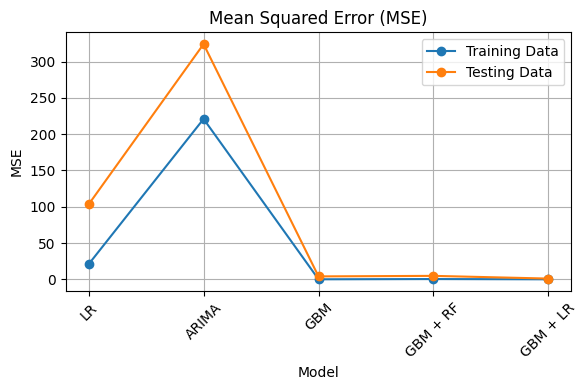

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MSE values
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]
mse_train = [20.7686, 221.0509, 0.0000, 0.3394, 0.0000]
mse_test = [103.2494, 324.2096, 4.0032, 4.7262, 1.0008]

# Plot MSE for training and testing data
plt.figure(figsize=(6, 4))
plt.plot(models, mse_train, marker='o', label='Training Data')
plt.plot(models, mse_test, marker='o', label='Testing Data')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Mean Absolute Error (MAE)

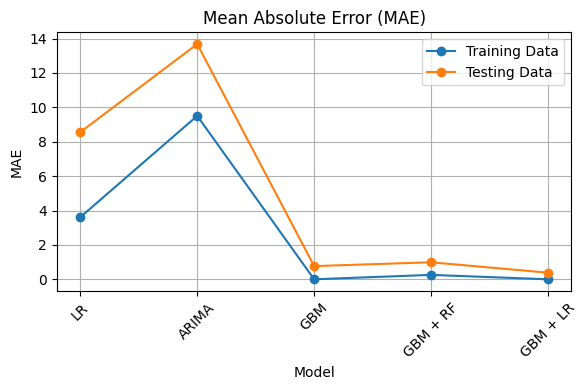

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding MAE values
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]
mae_train = [3.6101, 9.5059, 0.0006, 0.2569, 0.0003]
mae_test = [8.5578, 13.6796, 0.7680, 0.9902, 0.3840]

# Plot MAE for training and testing data
plt.figure(figsize=(6, 4))
plt.plot(models, mae_train, marker='o', label='Training Data')
plt.plot(models, mae_test, marker='o', label='Testing Data')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Root Mean Squared Error (RMSE)

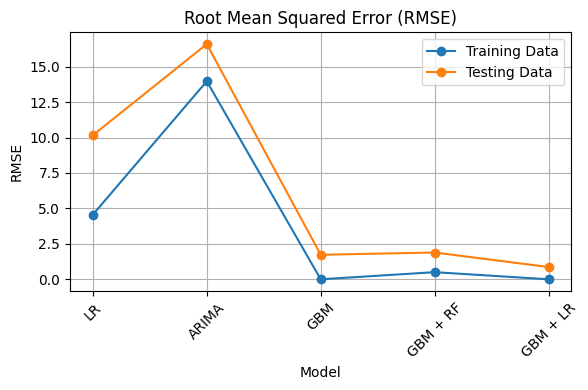

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding RMSE values
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]
rmse_train = [4.5573, 13.9725, 0.0008, 0.5036, 0.0004]
rmse_test = [10.1612, 16.5935, 1.7313, 1.8901, 0.8657]

# Plot RMSE for training and testing data
plt.figure(figsize=(6, 4))
plt.plot(models, rmse_train, marker='o', label='Training Data')
plt.plot(models, rmse_test, marker='o', label='Testing Data')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# R^2 Score

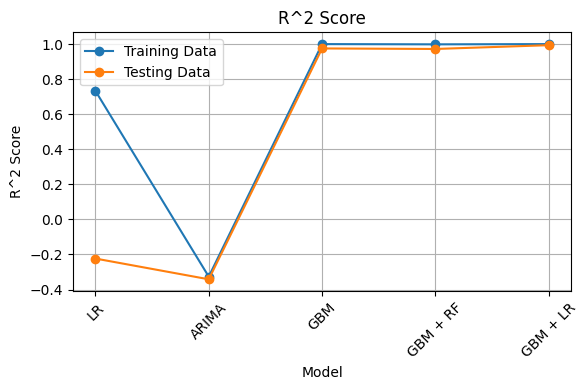

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding R^2 values
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]
r2_train = [0.7330, -0.3263, 0.9999, 0.9986, 1.0000]
r2_test = [-0.2232, -0.3415, 0.9752, 0.9722, 0.9938]

# Plot R^2 for training and testing data
plt.figure(figsize=(6, 4))
plt.plot(models, r2_train, marker='o', label='Training Data')
plt.plot(models, r2_test, marker='o', label='Testing Data')
plt.title('R^2 Score')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


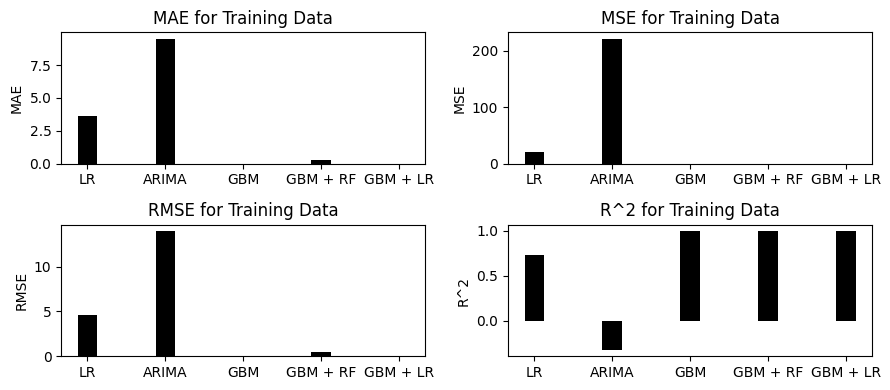

In [ ]:
import matplotlib.pyplot as plt

# Define the models
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]

# Define the performance metrics for training data
mse_train = [20.7686, 221.0509, 0.0000, 0.3394, 0.0000]
mae_train = [3.6101, 9.5059, 0.0003, 0.2569, 0.0003]
rmse_train = [4.5573, 13.9725, 0.0008, 0.5036, 0.0004]
r2_train = [0.7330, -0.3263, 1.0000, 0.9986, 1.0000]

# Set the width of the bars
bar_width = 0.25

# Plot bar graphs for each performance metric
plt.figure(figsize=(9, 4))

# MAE for training data
plt.subplot(2, 2, 1)
plt.bar(models, mae_train, color='black', width=bar_width)
plt.ylabel('MAE')
plt.title('MAE for Training Data')

# MSE for training data
plt.subplot(2, 2, 2)
plt.bar(models, mse_train, color='black', width=bar_width)
plt.ylabel('MSE')
plt.title('MSE for Training Data')

# RMSE for training data
plt.subplot(2, 2, 3)
plt.bar(models, rmse_train, color='black', width=bar_width)
plt.ylabel('RMSE')
plt.title('RMSE for Training Data')

# R^2 for training data
plt.subplot(2, 2, 4)
plt.bar(models, r2_train, color='black', width=bar_width)
plt.ylabel('R^2')
plt.title('R^2 for Training Data')

plt.tight_layout()
plt.show()


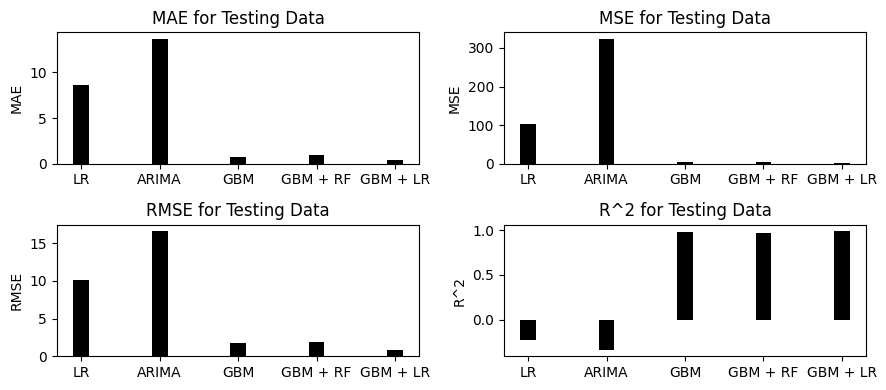

In [ ]:
import matplotlib.pyplot as plt

# Define the models
models = ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"]

# Define the performance metrics for testing data
mse_test = [103.2494, 324.2096, 4.0032, 4.7262, 1.0008]
mae_test = [8.5578, 13.6796, 0.7680, 0.9902, 0.3840]
rmse_test = [10.1612, 16.5935, 1.7313, 1.8901, 0.8657]
r2_test = [-0.2232, -0.3415, 0.9752, 0.9722, 0.9938]

# Set the bar width
bar_width = 0.2

# Plot bar graphs for each performance metric for testing data
plt.figure(figsize=(9, 4))

# MAE for testing data
plt.subplot(2, 2, 1)
plt.bar(models, mae_test, color='black', width=bar_width)
plt.ylabel('MAE')
plt.title('MAE for Testing Data')

# MSE for testing data
plt.subplot(2, 2, 2)
plt.bar(models, mse_test, color='black', width=bar_width)
plt.ylabel('MSE')
plt.title('MSE for Testing Data')

# RMSE for testing data
plt.subplot(2, 2, 3)
plt.bar(models, rmse_test, color='black', width=bar_width)
plt.ylabel('RMSE')
plt.title('RMSE for Testing Data')

# R^2 for testing data
plt.subplot(2, 2, 4)
plt.bar(models, r2_test, color='black', width=bar_width)
plt.ylabel('R^2')
plt.title('R^2 for Testing Data')

plt.tight_layout()
plt.show()

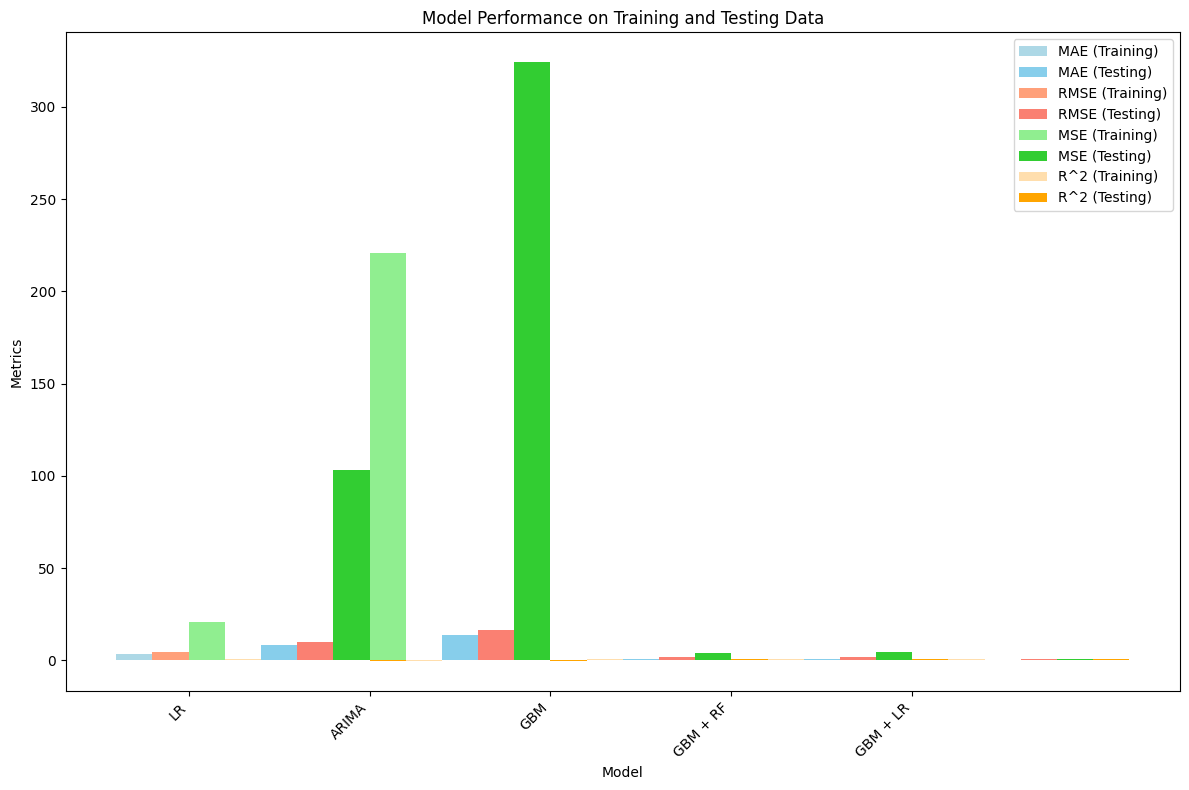

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Model": ["LR", "ARIMA", "GBM", "GBM + RF", "GBM + LR"],
    "MAE (Training)": [3.6101, 9.5059, 0.0006, 0.2569, 0.0003],
    "RMSE (Training)": [4.5573, 13.9725, 0.0008, 0.5036, 0.0004],
    "MAE (Testing)": [8.5578, 13.6796, 0.7680, 0.9902, 0.3840],
    "RMSE (Testing)": [10.1612, 16.5935, 1.7313, 1.8901, 0.8657],
    "MSE (Training)": [20.7686, 221.0509, 0.0000, 0.3394, 0.0000],
    "R^2 (Training)": [0.7330, -0.3263, 1.0000, 0.9986, 1.0000],
    "MSE (Testing)": [103.2494, 324.2096, 4.0032, 4.7262, 1.0008],
    "R^2 (Testing)": [-0.2232, -0.3415, 0.9752, 0.9722, 0.9938]
}

# Extracting the models and corresponding metrics
models = data["Model"]
metrics = ["MAE", "RMSE", "MSE", "R^2"]
training_metrics = [metric + " (Training)" for metric in metrics]
testing_metrics = [metric + " (Testing)" for metric in metrics]
values_training = np.array([data[metric] for metric in training_metrics])
values_testing = np.array([data[metric] for metric in testing_metrics])

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(models))

colors_training = ['lightblue', 'lightsalmon', 'lightgreen', 'navajowhite']
colors_testing = ['skyblue', 'salmon', 'limegreen', 'orange']

for i, (training_metric, testing_metric) in enumerate(zip(training_metrics, testing_metrics)):
    ax.bar(index + i * bar_width, values_training[i], bar_width, label=training_metric, color=colors_training[i])
    ax.bar(index + (i + len(metrics)) * bar_width, values_testing[i], bar_width, label=testing_metric, color=colors_testing[i])

ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Model Performance on Training and Testing Data')
ax.set_xticks(index + 0.5 * bar_width * (len(metrics) - 1))
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#  prediction of electricity consumption

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# List of appliances
appliances = ['fan', 'tubelight', 'television', 'refrigerator', 'washing_machine', 'microwave_ovan',
              'water_purifier', 'ac', 'water_heater', 'motor_pump', 'air_cooler', 'computer', 'electric_stove']

# Preprocess categorical variables (one-hot encoding for 'month' column)
data = pd.get_dummies(data, columns=['month'])

# Prepare features and target variables
X = data.drop(['id', 'uname', 'year'] + appliances, axis=1)  # Remove target variables and other non-feature columns
y = data[appliances]

# Dictionary to store predicted consumption for each appliance
predicted_consumption = {}

for appliance in appliances:
    # Train the Gradient Boosting model
    gbm_model = GradientBoostingRegressor(random_state=42)
    gbm_model.fit(X, y[appliance])

    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y[appliance])

    # Prepare features for the next month (assuming the last row in the dataset represents the latest month)
    X_next_month = X.tail(1).copy()

    # Make predictions using both models
    gbm_prediction = gbm_model.predict(X_next_month)
    lr_prediction = lr_model.predict(X_next_month)

    # Combine predictions (for demonstration purpose, taking average)
    combined_prediction = (gbm_prediction + lr_prediction) / 2

    # Store the predicted consumption for the current appliance
    predicted_consumption[appliance] = combined_prediction[0]

# Print the predicted electricity consumption for each appliance for the next month
print("Predicted electricity consumption for each appliance for the next month(April):")
for appliance, consumption in predicted_consumption.items():
    print(f"{appliance.capitalize()}: {consumption:.2f}")

Predicted electricity consumption for each appliance for the next month(April):
Fan: 35.38
Tubelight: 29.72
Television: 40.89
Refrigerator: 29.33
Washing_machine: 31.97
Microwave_ovan: 37.71
Water_purifier: 24.53
Ac: 150.04
Water_heater: 22.81
Motor_pump: 38.82
Air_cooler: 41.86
Computer: 34.01
Electric_stove: 34.19


In [ ]:
# ## GBM + LR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")

# Extract features (independent variables)
X = data.drop(['id', 'uname', 'year', 'month'], axis=1)

# List of appliances (including electric_stove)
appliances = X.columns.tolist()

combined_test_mse_results = []
combined_test_mae_results = []
combined_test_rmse_results = []
combined_test_r2_results = []

# Iterate over each appliance
for appliance in appliances:
    # Set the target variable for the current appliance
    y = X[appliance]

    # Split the dataset into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Train the Gradient Boosting model
    gbm_model = GradientBoostingRegressor(random_state=42)
    gbm_model.fit(X_train, y_train)

    # Make predictions with both models on testing data
    lr_test_pred = lr_model.predict(X_test)
    gbm_test_pred = gbm_model.predict(X_test)

    # Combine predictions by averaging
    combined_test_pred = (lr_test_pred + gbm_test_pred) / 2

    # Performance analysis for combined model on testing data
    combined_test_mse = mean_squared_error(y_test, combined_test_pred)
    combined_test_mae = mean_absolute_error(y_test, combined_test_pred)
    combined_test_rmse = np.sqrt(combined_test_mse)
    combined_test_r2 = r2_score(y_test, combined_test_pred)

    combined_test_mse_results.append(combined_test_mse)
    combined_test_mae_results.append(combined_test_mae)
    combined_test_rmse_results.append(combined_test_rmse)
    combined_test_r2_results.append(combined_test_r2)

# Overall performance analysis for combined model
overall_combined_test_mse = np.mean(combined_test_mse_results)
overall_combined_test_mae = np.mean(combined_test_mae_results)
overall_combined_test_rmse = np.mean(combined_test_rmse_results)
overall_combined_test_r2 = np.mean(combined_test_r2_results)

# Print overall performance analysis with four decimal points
print("\nOverall Performance Analysis for Combined Model:")
print("Testing Data")
print("MSE: {:.4f}".format(overall_combined_test_mse))
print("MAE: {:.4f}".format(overall_combined_test_mae))
print("RMSE: {:.4f}".format(overall_combined_test_rmse))
print("R^2: {:.4f}".format(overall_combined_test_r2))


Overall Performance Analysis for Combined Model:
Testing Data
MSE: 1.0008
MAE: 0.3840
RMSE: 0.8657
R^2: 0.9938


In [18]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")
X = data.drop(columns=['id', 'uname', 'year', 'month'])  # Assuming 'id', 'uname', 'year', 'month' are not features
y = data['electric_stove']  # Target variable

# Data preprocessing
# This step can include handling missing values, scaling, encoding categorical variables, etc.
# For simplicity, we assume the data is already preprocessed

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Trees (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Calculation (using mean squared error loss)
gradient = 2 * (rf_model.predict(X_train) - y_train)

# Loss Function Calculation
initial_loss = mean_squared_error(y_train, rf_model.predict(X_train))
print("Initial Loss (Random Forest):", initial_loss)

# Update Tree Weights (Boosted RF)
learning_rate = 0.1
for _ in range(100):  # Number of boosting iterations
    # Train a gradient boosting model to predict the residuals
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=learning_rate, random_state=42)
    gb_model.fit(X_train, gradient)

    # Update predictions based on the gradient boosting model
    for estimator in gb_model.estimators_:
        rf_model.estimators_.append(estimator[0])  # Add each tree from the boosting model

    # Compute the updated loss
    updated_loss = mean_squared_error(y_train, rf_model.predict(X_train))
    print("Updated Loss (Boosted RF):", updated_loss)

    # Compute the new gradient
    gradient = 2 * (rf_model.predict(X_train) - y_train)

    # Update learning rate (optional)
    learning_rate *= 0.9  # Decay the learning rate for each iteration

# Final Prediction
final_predictions = rf_model.predict(X_test)
final_loss = mean_squared_error(y_test, final_predictions)
print("Final Loss (Test Set):", final_loss)

Initial Loss (Random Forest): 0.305178
Updated Loss (Boosted RF): 362.4441228308386
Updated Loss (Boosted RF): 646.5530408746664
Updated Loss (Boosted RF): 822.0859915315118
Updated Loss (Boosted RF): 939.6088107167765
Updated Loss (Boosted RF): 1024.126957423307
Updated Loss (Boosted RF): 1088.423004340349
Updated Loss (Boosted RF): 1139.6006995214207
Updated Loss (Boosted RF): 1181.9099998052134
Updated Loss (Boosted RF): 1218.0557744438934
Updated Loss (Boosted RF): 1249.8504421946325
Updated Loss (Boosted RF): 1278.5638351401185
Updated Loss (Boosted RF): 1305.1202508710076
Updated Loss (Boosted RF): 1330.2160730164046
Updated Loss (Boosted RF): 1354.3907807976834
Updated Loss (Boosted RF): 1378.0747594221693
Updated Loss (Boosted RF): 1401.6194335490902
Updated Loss (Boosted RF): 1425.3171286029701
Updated Loss (Boosted RF): 1449.416019055856
Updated Loss (Boosted RF): 1474.1270836468948
Updated Loss (Boosted RF): 1499.6359260276834
Updated Loss (Boosted RF): 1526.106550352436
Upd

In [19]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")
X = data.drop(columns=['id', 'uname', 'year', 'month'])  # Assuming 'id', 'uname', 'year', 'month' are not features
y = data['electric_stove']  # Target variable

# Data preprocessing
# This step can include handling missing values, scaling, encoding categorical variables, etc.
# For simplicity, we assume the data is already preprocessed

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Trees (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Calculation (using mean squared error loss)
gradient = 2 * (rf_model.predict(X_train) - y_train)

# Loss Function Calculation
initial_loss = mean_squared_error(y_train, rf_model.predict(X_train))
print("Initial Loss (Random Forest):", initial_loss)

# Update Tree Weights (Boosted RF)
learning_rate = 0.1
max_boosting_iterations = 100
tolerance = 1e-4  # Define a tolerance level for improvement in loss

for boosting_iteration in range(max_boosting_iterations):
    # Train a gradient boosting model to predict the residuals
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=learning_rate, random_state=42)
    gb_model.fit(X_train, gradient)

    # Update predictions based on the gradient boosting model
    for estimator in gb_model.estimators_:
        rf_model.estimators_.append(estimator[0])  # Add each tree from the boosting model

    # Compute the updated loss
    updated_loss = mean_squared_error(y_train, rf_model.predict(X_train))
    print(f"Iteration {boosting_iteration + 1}, Updated Loss (Boosted RF): {updated_loss}")

    # Check if improvement in loss is negligible
    if abs(updated_loss - initial_loss) < tolerance:
        print("Improvement in loss is negligible. Stopping boosting.")
        break

    # Compute the new gradient
    gradient = 2 * (rf_model.predict(X_train) - y_train)

    # Update learning rate (optional)
    learning_rate *= 0.9  # Decay the learning rate for each iteration

# Final Prediction
final_predictions = rf_model.predict(X_test)
final_loss = mean_squared_error(y_test, final_predictions)
print("Final Loss (Test Set):", final_loss)


Initial Loss (Random Forest): 0.305178
Iteration 1, Updated Loss (Boosted RF): 362.4441228308386
Iteration 2, Updated Loss (Boosted RF): 646.5530408746664
Iteration 3, Updated Loss (Boosted RF): 822.0859915315118
Iteration 4, Updated Loss (Boosted RF): 939.6088107167765
Iteration 5, Updated Loss (Boosted RF): 1024.126957423307
Iteration 6, Updated Loss (Boosted RF): 1088.423004340349
Iteration 7, Updated Loss (Boosted RF): 1139.6006995214207
Iteration 8, Updated Loss (Boosted RF): 1181.9099998052134
Iteration 9, Updated Loss (Boosted RF): 1218.0557744438934
Iteration 10, Updated Loss (Boosted RF): 1249.8504421946325
Iteration 11, Updated Loss (Boosted RF): 1278.5638351401185
Iteration 12, Updated Loss (Boosted RF): 1305.1202508710076
Iteration 13, Updated Loss (Boosted RF): 1330.2160730164046
Iteration 14, Updated Loss (Boosted RF): 1354.3907807976834
Iteration 15, Updated Loss (Boosted RF): 1378.0747594221693
Iteration 16, Updated Loss (Boosted RF): 1401.6194335490902
Iteration 17, Up

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/project/Dataset.csv")